In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/ 111.0.5563.111"})
    soup=bts(result.text,"html.parser")
    return soup

In [97]:
pages=["https://www.immobiliare.it/en/affitto-case/milano/"]
for page in range(2,81):
    pages.append("https://www.immobiliare.it/en/affitto-case/milano/?pag=" +str (page))
    
pages

['https://www.immobiliare.it/en/affitto-case/milano/',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=2',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=3',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=4',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=5',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=6',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=7',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=8',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=9',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=10',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=11',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=12',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=13',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=14',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=15',
 'https://www.immobiliare.it/en/affitto-case/milano/?pag=16',
 'https://www.immobilia

In [98]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"in-card__title"}):
        links.append(resulthf.get("href"))

links


['https://www.immobiliare.it/en/annunci/102057014/',
 'https://www.immobiliare.it/en/annunci/102055974/',
 'https://www.immobiliare.it/en/annunci/102062296/',
 'https://www.immobiliare.it/en/annunci/102055026/',
 'https://www.immobiliare.it/en/annunci/102054762/',
 'https://www.immobiliare.it/en/annunci/102062026/',
 'https://www.immobiliare.it/en/annunci/102056882/',
 'https://www.immobiliare.it/en/annunci/102052302/',
 'https://www.immobiliare.it/en/annunci/102056164/',
 'https://www.immobiliare.it/en/annunci/102056702/',
 'https://www.immobiliare.it/en/annunci/102056568/',
 'https://www.immobiliare.it/en/annunci/102056434/',
 'https://www.immobiliare.it/en/annunci/102057078/',
 'https://www.immobiliare.it/en/annunci/102056150/',
 'https://www.immobiliare.it/en/annunci/102055856/',
 'https://www.immobiliare.it/en/annunci/102051854/',
 'https://www.immobiliare.it/en/annunci/102052298/',
 'https://www.immobiliare.it/en/annunci/102061416/',
 'https://www.immobiliare.it/en/annunci/102061

In [99]:
len(links)

2000

In [180]:
ex=getAndParseURL("https://www.immobiliare.it/en/annunci/102012690/")

In [190]:
### Rental Price ###
ex.find("li",{"class":"nd-list__item in-feat__item in-feat__item--main in-detail__mainFeaturesPrice"}).text.replace("€ ","").replace(",","").replace("/month","")

'1700'

In [182]:
### Area of Flat ###
ex.find("dl",{"class":"in-realEstateFeatures__list"}).find(text=re.compile("surface")).findNext().text[0:3].strip()

'80'

In [183]:
#Room Num ##
ex.find("dl",{"class":"in-realEstateFeatures__list"}).find(text=re.compile("rooms")).findNext().text[0:2].strip()

'2'

In [184]:
### Bathroom ###
ex.findAll("div",{"class":"in-feat__data"})[2].text

'1'

In [185]:
### FLOOR Num ###
ex.findAll("div",{"class":"in-feat__data"})[3].text.strip()

'4'

In [186]:
### LOCATION INFO ###
ex.find("h1",{"class":"in-titleBlock__title"}).text.strip()

'2-room flat via Cusani 12, Cadorna - Castello, Milan'

In [187]:
### DEPOSIT ###
ex.find("section",{"class":"in-wrapper is-detailView in-landingDetail"}).find(text=re.compile("Expenses")).findNext().text[60:].replace("€","").replace(",","").strip()

''

In [189]:
### Expenses ###
ex.find("section",{"class":"in-wrapper is-detailView in-landingDetail"}).find(text=re.compile("fees")).findNext().text.replace("€ ","").replace(",","").replace("/month","").strip()

'290'

In [192]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        ad_info = html.find("h1",{"class":"in-titleBlock__title"}).text.strip()
    except:
        ad_info = np.nan
    try:
        rent= html.find("li",{"class":"nd-list__item in-feat__item in-feat__item--main in-detail__mainFeaturesPrice"}).text.replace("€ ","").replace(",","").replace("/month","")
    except:
        rent = np.nan
    try:
        room = html.find("dl",{"class":"in-realEstateFeatures__list"}).find(text=re.compile("rooms")).findNext().text[0:2].strip()
    except:
        room = np.nan
    try:
        bathroom = html.findAll("div",{"class":"in-feat__data"})[2].text
    except:
        bathroom = np.nan
    try:
        net_area = html.find("dl",{"class":"in-realEstateFeatures__list"}).find(text=re.compile("surface")).findNext().text[0:3].strip()
    except:
        net_area = np.nan
    try:
        floor = html.findAll("div",{"class":"in-feat__data"})[3].text.strip()
    except:
        floor = np.nan
    try:
        expenses = html.find("section",{"class":"in-wrapper is-detailView in-landingDetail"}).find(text=re.compile("fees")).findNext().text.replace("€ ","").replace(",","").replace("/month","").strip()
    except:
        expenses = np.nan
    try:
        deposit = html.find("section",{"class":"in-wrapper is-detailView in-landingDetail"}).find(text=re.compile("Expenses")).findNext().text[60:].replace("€","").replace(",","").strip()
    except:
        deposit = np.nan
    time.sleep(2)
    
    result.append([ad_info,rent,room,bathroom,net_area,floor,expenses,deposit])
    
columns=["Ad_Info","Rent","Bedroom","Bathroom","Net Area","Floor","Expenses","Deposit"]
df = pd.DataFrame.from_records(result, columns=columns)

In [193]:
df.to_csv("milano_rental.csv")

In [2]:
df=pd.read_csv("milano_rental.csv")

In [215]:
df.head(12)

,Unnamed: 0,Ad_Info,Rent,Bedroom,Bathroom,Net Area,Floor,Expenses,Deposit
0,0,"3-room flat via Gian Francesco Pizzi 14, Ripam...",1900,3,2,130,1,100,NaN
1,1,"Studio via Mantova 17, Porta Romana - Medaglie...",790,1,1,25,5,60,NaN
2,2,"2-room flat via Roberto Bellarmino 9, Chiesa R...",950,2,1,61,1,150,NaN
3,3,"2-room flat via Ruggero di Lauria 9, Sempione,...",1050,2,1,45,4,50,NaN
4,4,"2-room flat Foro Buonaparte 63, Cadorna - Cast...",1700,2,1,80,4,280,NaN
5,5,"2-room flat via Poma, 61, Indipendenza, Milan",1500,2,1,49,3,183,NaN
6,6,"3-room flat via Don Giuseppe Andreoli, Bovisa,...",1500,3,2,60,1,No condominium fees,NaN
7,7,"2-room flat via Cislaghi, 9, Precotto, Milan",850,2,1,50,1,100,NaN
8,8,"2-room flat via Palmanova, Cimiano, Milan",1050,2,1,50,4,No condominium fees,1050
9,9,"2-room flat via Giacomo Zanella, Argonne - Cor...",1800,2,1,60,2,No condominium fees,1800


In [199]:
df["Rent"].unique()

array(['1900', '790', '950', '1050', '1700', '1500', '850', '1800',
       '1550', '1400', '2000', '740', '750', '1000', '900', '700', '2550',
       '1300', '2500', '1100', '1250', '3500', '3083', '1150', '2750',
       '1280', '2916', '500', '5500', '2333', '1600', '1096', '2200',
       '1916', '670', '3850', nan, '990', '1350', '8083', '1200', '2084',
       '6000', '3000', '590', '2600', '5000', '970', '930', '890', '1590',
       'Price on application', '800', '830', '1750', '3450', '2900',
       '1030', '2450', '2100', '920', '1950', '2800', '2150', '1850',
       '3305', '1450', '620', '720', '3350', '4200', '2667', '3900',
       '1958', '1330', '10000', '2300', '1060', '835', '650', '3750',
       '1650', '1070', '3667', '1290', '2350', '8500', '2250', '1460',
       '9300', '6500', '3300', '2417', '2180', '4167', '1530', '980',
       '3958', '3200', '7500', '2400', '2700', '2042', '1090', '7000',
       '1245', '2050', '1175', '3166', '1125', '4000', '5665', '1580',
      

In [3]:
df["Rent"]=df["Rent"].apply(lambda x: "2000" if x =="Price on application"else x)
df["Rent"]=df["Rent"].apply(lambda x: "2000" if x =="nan"else x)
df["Rent"]=df["Rent"].astype(float)

In [217]:
df["Rent"].mean()

1910.4624306606152

In [218]:
df["Rent"].max()

22000.0

In [204]:
df["Rent"].min()

500.0

In [220]:
df["Bathroom"].value_counts()

1.0    1433
2.0     362
3.0     135
6.0       2
4.0       2
5.0       1
Name: Bathroom, dtype: int64

In [4]:
df["Bathroom"]=df["Bathroom"].apply(lambda x: "3" if x =="3+" else x)
df["Bathroom"]=df["Bathroom"].apply(lambda x: "1" if x =="G" else x)
df["Bathroom"]=df["Bathroom"].apply(lambda x: "1" if x =="M" else x)
df["Bathroom"]=df["Bathroom"].astype(float)

In [8]:
df["Bathroom"].unique()

array([2, 1, 3, 5, 6, 4])

In [7]:
df["Bathroom"]=df["Bathroom"].fillna(1)
df["Bathroom"]=df["Bathroom"].astype(int)

In [9]:
df["Bedroom"].unique()

array(['3', '1', '2', '4', '5+', '5', nan, '6'], dtype=object)

In [10]:
df["Bedroom"]=df["Bedroom"].fillna(22)
df["Bedroom"]=df["Bedroom"].str.replace("+","")
df["Bedroom"]=df["Bedroom"].str.strip()

C:\Users\User\AppData\Local\Temp\ipykernel_13400\2144031261.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Bedroom"]=df["Bedroom"].str.replace("+","")


In [15]:
df["Bedroom"]=df["Bedroom"].fillna(1)
df["Bedroom"].unique()

array(['3', '1', '2', '4', '5', 1, '6'], dtype=object)

In [16]:
df["Bedroom"]=df["Bedroom"].astype(int)

In [17]:
df["Bedroom"].unique()

array([3, 1, 2, 4, 5, 6])

In [32]:
df["Deposit"].unique()

array([2000, '1050', '1800', '1550', '1400', '1200', '10000', '1700',
       '1250', '5000', '970', '3750', '2200', '1100', '1000', '1600',
       '4100', '3000', '000', '850', '900', '4400', '3600', '1300',
       '2400', '3700', '2180', '2490', '3', '2800', '1500', '2000',
       '1350', '5200', '7000', '2700', '2850', '44000', '375', '3200',
       '2300', '700', '6600', '950', '2260', '6000', '1650', '0', '7600',
       '3300', '750', '1', '5100', '5380', '4300', '4000', '2600',
       '20000', '720', '11700', '4740', '4500', '1450', '4120', '8000',
       '00'], dtype=object)

In [31]:
df["Deposit"]=df["Deposit"].str.strip()
df["Deposit"]=df["Deposit"].fillna(2000)

In [34]:
df["Deposit"]=df["Deposit"].astype(int)
df["Deposit"].max()

44000

In [39]:
df["Deposit"].mean()

2090.4646464646466

In [38]:
df=df.loc[(df["Deposit"] >= 1000) & (df["Deposit"] <= 45000),:]

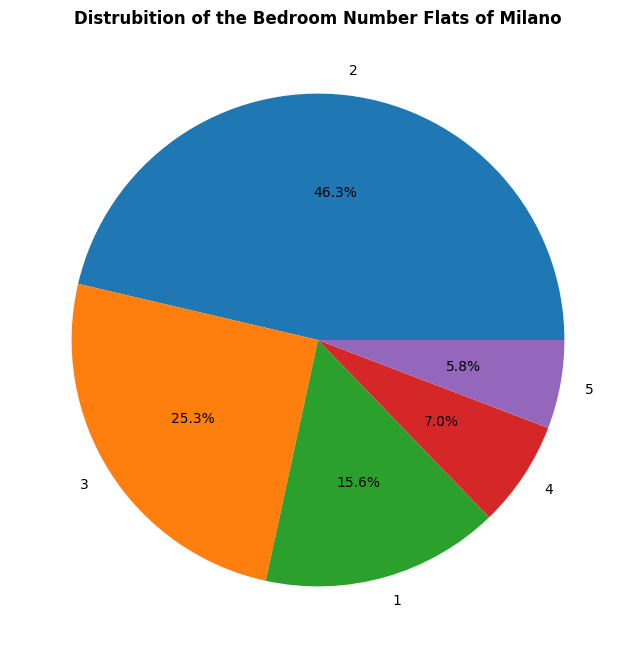

In [41]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Bedroom'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Milano',weight="bold")

# display the chart
plt.show();


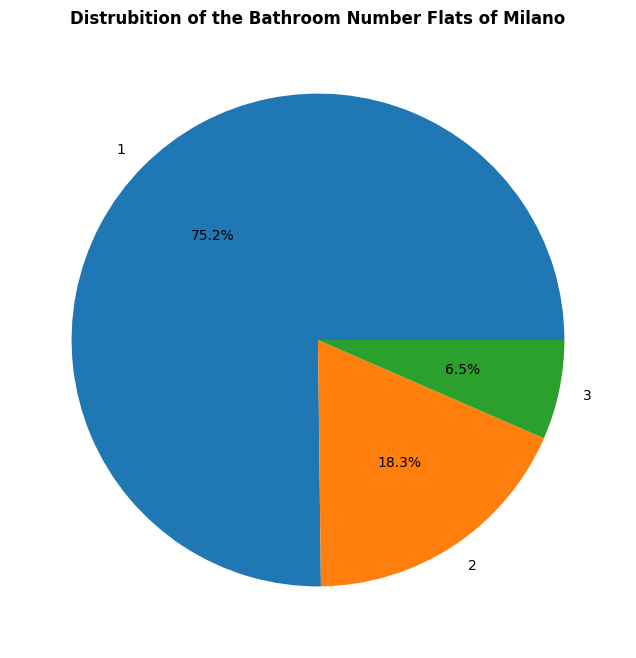

In [44]:
# get the value counts of the 'Bedroom' column
room_counts = df['Bathroom'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bathroom_counts = room_counts[room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bathroom_counts, labels=filtered_bathroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bathroom Number Flats of Milano',weight="bold")

# display the chart
plt.show();


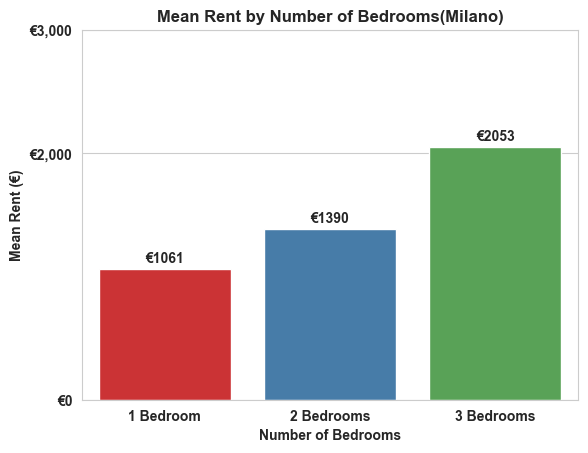

In [45]:
# Calculate mean rent for each group 
one_bed_mean_rent = df[df['Bedroom'] == 1]['Rent'].mean()
two_bed_mean_rent = df[df['Bedroom'] == 2]['Rent'].mean()
three_bed_mean_rent = df[df['Bedroom'] == 3]['Rent'].mean()

# Create a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 3000])
ax.set_yticklabels(['€0', '€2,000', '€3,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Milano)', weight='bold')

plt.show();